<a href="https://colab.research.google.com/github/KhomZ/image-processing-and-pattern-recognition/blob/main/khom_lab1_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 1 Report**

Submitted By: Khom Raj Thapa Magar

College Roll No. : 171347

Computer Engineering(Day)

# Libraries Used:


*   Numpy:

NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.


*   Matplotlib:

Matplotlib is a cross-platform, data visualization and graphical plotting library for Python and its numerical extension NumPy. As such, it offers a viable open source alternative to MATLAB. Developers can also use matplotlib’s APIs (Application Programming Interfaces) to embed plots in GUI applications.


*   OpenCV:

OpenCV stands for open-source computer vision. It was generated to support a common infrastructure for computer vision operations and use system behaviour in financial products. It generally targets image processing, faces recognition, video capture, searching, and object disclosure.






In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Lab 1 Contents

## Reading Image:
Before processing any image, we need to read the image first. It can be used to pixel manipulation, image enhancement, and brightness adjustment etc.


In [21]:
from google.colab import files

img = files.upload()

Saving einstein1.jpg to einstein1.jpg


In [22]:
img = cv2.imread("./einstein1.jpg") # Reading image using opencv
# img = plt.imread("./cat.jpg") # Reading image using matplotlib.pyplot
print(img) # Displaying image in matrix form


[[[ 96 126 171]
  [ 97 127 173]
  [101 131 176]
  ...
  [ 36  37  73]
  [ 34  35  74]
  [ 37  37  76]]

 [[ 96 126 171]
  [ 97 127 173]
  [ 98 129 174]
  ...
  [ 44  45  81]
  [ 41  42  81]
  [ 37  37  76]]

 [[ 97 127 173]
  [ 96 126 171]
  [ 95 125 170]
  ...
  [ 47  49  85]
  [ 45  46  84]
  [ 40  41  80]]

 ...

 [[ 42  36  46]
  [ 40  35  45]
  [ 39  34  44]
  ...
  [ 38  44 102]
  [ 45  51 109]
  [ 42  47 106]]

 [[ 38  32  42]
  [ 33  28  38]
  [ 46  41  51]
  ...
  [ 46  53 109]
  [ 40  46 102]
  [ 40  46 102]]

 [[ 39  34  44]
  [ 49  43  53]
  [ 43  37  47]
  ...
  [ 44  50 106]
  [ 44  50 106]
  [ 42  48 104]]]


## Writing Image:
Writing image can be used to save an image to any storage device.

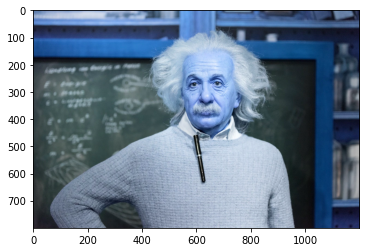

In [23]:
cv2.imwrite("./einstein1.jpg", img) # Save einstein.jpg
plt.imshow(img) # Display image from array values.

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Plotting Histogram:
In an image processing context, the histogram of an image normally refers to a histogram of the pixel intensity values. This histogram is a graph showing the number of pixels in an image at each different intensity value found in that image. For an 8-bit grayscale image there are 256 different possible intensities, and so the histogram will graphically display 256 numbers showing the distribution of pixels amongst those grayscale values.

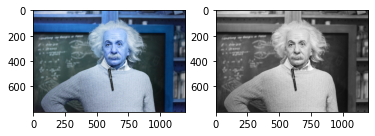

In [26]:
import matplotlib.pyplot as plt
img = cv2.imread("./einstein1.jpg") # Reading an image.
plt.subplot(1,2,1) # To display multiple images.
plt.imshow(img) # Display img.
img_grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Convert RGB to Grayscale image.
plt.subplot(1,2,2) # To display multiple images.
plt.imshow(img_grey) # Display grayscale image of img
plt.set_cmap("gray")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys


Text(0.5, 1.0, 'Histogram')

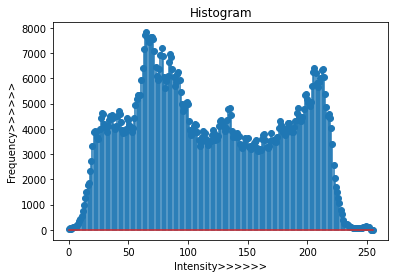

In [27]:
x_data = np.arange(256) # Array of intensities in a pixel.
count = np.zeros((256,),dtype='int32') # Array initialized with zeros.
for i in img_grey:
  for j in i:
    count[j]+=1 # Counting values of each intensity.

plt.stem(x_data, count) # Plotting histogram.
plt.xlabel("Intensity>>>>>>") # Setting label along x-axis.
plt.ylabel("Frequency>>>>>>") # Setting label along y-axis.
plt.title("Histogram") # Setting title of the histogram plot.

## Histogram Stretching:
  A point process that involves the application of an appropriate transformation function to every pixel of a digital image in order to redistribute the information of the histogram toward the extremes of a grey level range. The target of this operation consists of enhancing the contrast of digital images.

  Algorithm for Histogram Stretching:

    Step 1:

    Determine the values of **max**, **min**, **image_max** and **image_min**.
    
    Step 2:
    
    Calculate y as:
    
    y = (x-image_min)/(image_max-image_min)*(max-min)+min

    Step 3:

    Repeat the process for each pixel value by traversing through individual pixels in the image.



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


<StemContainer object of 3 artists>

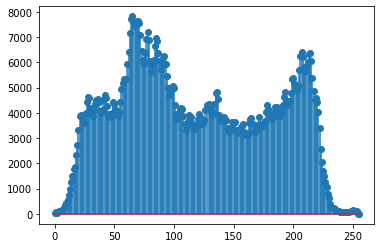

In [28]:
max = 255 # Setting max to 255 for 8-bit image.
min = 0 # Setting min to 0.
image_max = 0 # Initializing image_max to 0.
image_min = 0 # Initializing image_min to 0.
for ind,val in enumerate(count):
    if val > 6:
        image_min = ind # Finding value of image_min.
        break
for ind,val in enumerate(count[::-1]):
    if val > 6:
        image_max = len(count) - ind -1 # Finding value of image_max.
        break

x_stretch_data = [] # To store datas for x-axis ie intensity of pixels.
y_stretch_data = [] # To store datas for y-axis ie. count of each intensities.
for x in range(image_min, image_max+1):
        y = round((x-image_min)/(image_max-image_min)*(max-min)+min) # Mapping function for image stretching.
        x_stretch_data.append(y)
        y_stretch_data.append(count[x])

plt.stem(x_stretch_data, y_stretch_data) # Plotting histogram after stretching.

True

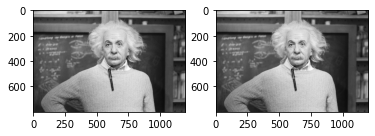

In [30]:
# Image before(left) and after(right) histogram stretching.
stretch_image = img_grey.copy()
for ind,lis in enumerate(img_grey):
  for ind2,val in enumerate(lis):
    if img_grey[ind, ind2] < image_min:
      stretch_image[ind,ind2] = 0
    elif  img_grey[ind, ind2] > image_max:
      stretch_image[ind, ind2] = 255
    else:
      stretch_image[ind,ind2] = x_stretch_data[img_grey[ind,ind2] - image_min]
plt.subplot(1,2,1)
plt.imshow(img_grey)
plt.subplot(1,2,2)
plt.imshow(stretch_image)
cv2.imwrite("einstein1.jpg", stretch_image) # Save new stretched image to storage.

## Histogram Equalization:  
  Histogram equalization is a widely used contrast-enhancement technique in image processing because of its high eﬃciency and simplicity. It is one of the sophisticated methods for modifying the dynamic range and contrast of an image by altering that image such that its intensity histogram has the desired shape.

  Algorithm for Histogram Equalization:
  
  Step 1:

  First, calculate the PMF (probability mass function) of all the pixels in the image.

  Step 2:

  Calculate CDF (cumulative distribution function) according to gray levels

  Step 3:

  Multiply the CDF values with (number of gray levels -(minus) 1).

  Considering we have a 3 bits per pixel image. Then, number of levels we have are 8. And 1 subtracted from 8 is 7. So we multiply CDF by 7.

  Step 4:

  Map new gray level values into/according to number of pixels which we have obtained

In [31]:
cdf = 0 # Initializing cdf to zero.
total_count = count.sum() # Determining total count or number of pixels.
equalized_level = [] 
for i in range(256):
  probability = count[i]/total_count # Calculating probability.
  cdf+=probability # Calculating cdf.
  equalized_level.append(round(255*cdf)) # Storing processed intensities.
equalized_level_arr = np.array(equalized_level) # Convertig list to numpy array.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if sys.path[0] == '':


<StemContainer object of 3 artists>

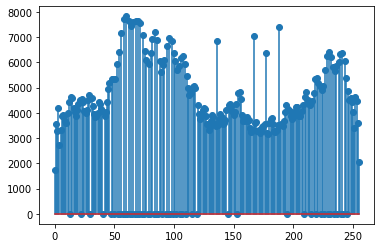

In [32]:
img_equalized = img_grey.copy() # Making copy of gray image.
x_eq_data = np.arange(256) # Array of intensities value.
y_eq_data = np.zeros((256,)) # Initializing array to zero.

for ind,val1 in enumerate(img_grey):
  for ind2,val2 in enumerate(val1):
    img_equalized[ind,ind2] = equalized_level_arr[val2] # Mapping new calculated intensities after histogram equalization.

for i in img_equalized:
  for j in i:
      y_eq_data[j]+=1
plt.stem(x_eq_data, y_eq_data) # Plotting histogram after equalization.

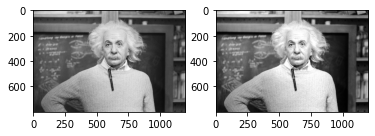

In [33]:
# Image before(left) and after(right) histogram equalization.
plt.subplot(1,2,1)
plt.imshow(img_grey)
plt.subplot(1,2,2)
plt.imshow(img_equalized)

# Conclusion
Wrapping up, we learnt to read and write image, plot histogram and perform histogram stretching and histogram equalization in the laboratory.